Import Thư viện thiết

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

Tiếp nhận thông tin

In [113]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values 
usernames = dataset.iloc[:, 2].values

Mã hóa dữ liệu

In [114]:
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [1])
    ],
    remainder='passthrough'
)
X = column_transformer.fit_transform(X)

Loại bỏ biến giả

In [115]:
X = X[:, 1:]

In [116]:
y = pd.Series(y).replace('', np.nan)  
y = pd.to_numeric(y, errors='coerce')  

# Tạo DataFrame từ X và y để dễ dàng loại bỏ các hàng có giá trị NaN
df = pd.DataFrame(X)
df['Exited'] = y

# Loại bỏ các hàng có giá trị NaN
df.dropna(inplace=True)

# Tách lại X và y sau khi loại bỏ NaN
X = df.iloc[:, :-1].values
y = df['Exited'].values

Chia các tập train, test

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Chuẩn hóa đặc trưng

In [118]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 MÔ HÌNH ANN

Khởi tạo

In [119]:
classifier = Sequential()
classifier.add(Input(shape=(X_train.shape[1],)))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

Biên dịch mô hình

In [120]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

Huấn luyện

In [121]:
classifier.fit(X_train, y_train, batch_size=10, epochs=150)

Epoch 1/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.7922 - loss: 0.5718
Epoch 2/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.7938 - loss: 0.4336
Epoch 3/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.7995 - loss: 0.4303
Epoch 4/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.7958 - loss: 0.4271
Epoch 5/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.7986 - loss: 0.4195
Epoch 6/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - accuracy: 0.8148 - loss: 0.4291
Epoch 7/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.8233 - loss: 0.4149
Epoch 8/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.8283 - loss: 0.4175
Epoch 9/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.8300 - loss: 0.4089
Epoch 10/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.8312 - loss: 0.4140
Epoch 11/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8340 - loss: 0.4128
Epoch 12/150
800/800 

Dự báo kết quả

In [122]:
y_pred = classifier.predict(X_test) 
y_pred = (y_pred > 0.5).astype(int).flatten()
X_test_index = dataset.iloc[X_train.shape[0]:X_train.shape[0] + len(y_test)].index

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Tạo ma trận nhầm lẫn

In [123]:
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
print(f"Độ chính xác của mô hình: {accuracy * 100:.2f}%")

Độ chính xác của mô hình: 84.50%


Bảng tỉ lệ phần trăm đúng sai

Bảng dự đoán tỉ lệ đúng sai


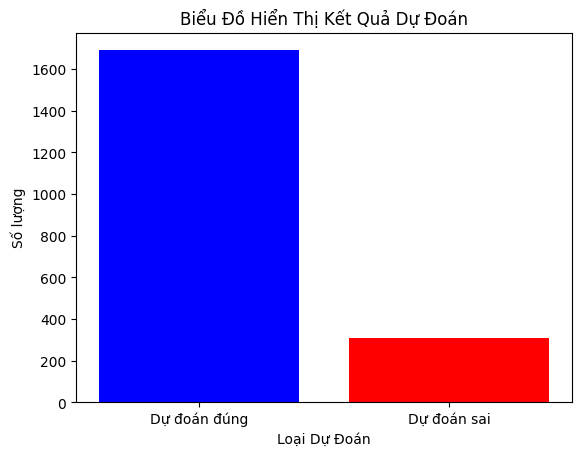

In [124]:
print('Bảng dự đoán tỉ lệ đúng sai')
labels = ['Dự đoán đúng', 'Dự đoán sai']
counts = [cm[0, 0] + cm[1, 1], cm[0, 1] + cm[1, 0]]
plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('Loại Dự Đoán')
plt.ylabel('Số lượng')
plt.title('Biểu Đồ Hiển Thị Kết Quả Dự Đoán')
plt.show()

Biểu đồ tỉ lệ giới tính 

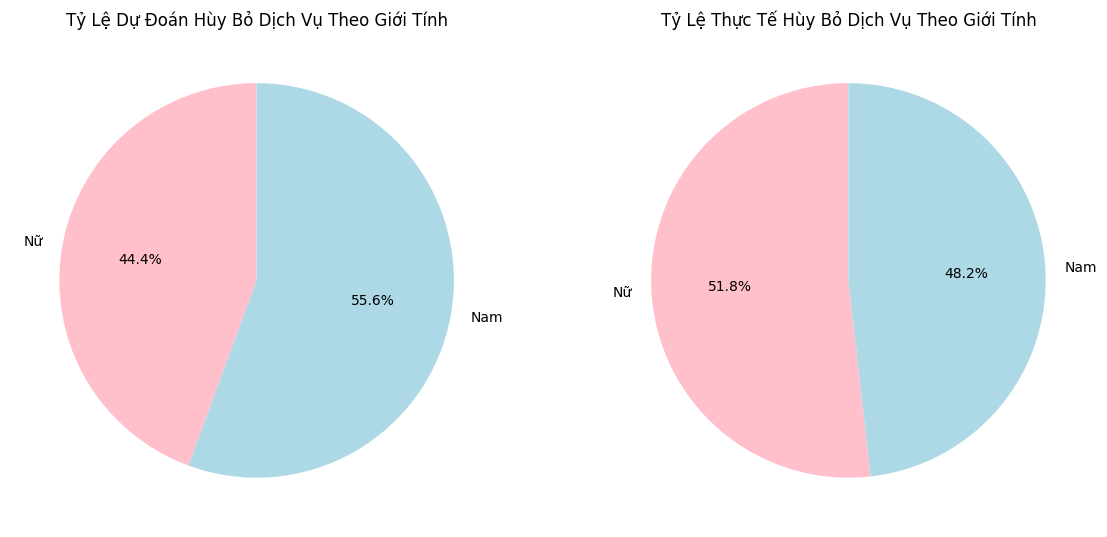

In [125]:
gender_exit_pred = pd.DataFrame({'Gender': dataset.loc[X_test_index, 'Gender'].values[:len(y_pred)], 'Predicted_Exited' : y_pred})
gender_exit_real = dataset.loc[X_test_index, ['Gender', 'Exited']]

# Loại bỏ các giá trị NaN trong dữ liệu
gender_exit_pred.dropna(inplace=True)
gender_exit_real.dropna(inplace=True)

# Tính số lượng dự đoán hủy bỏ dịch vụ theo giới tính

gender_exit_counts_pred = [
np.sum((gender_exit_pred['Gender'] == 'Female') & (gender_exit_pred['Predicted_Exited'] == 1)),
np.sum((gender_exit_pred['Gender'] == 'Male') & (gender_exit_pred['Predicted_Exited'] == 1))
]

# Tính số lượng thực tế hủy bỏ dịch vụ theo giới tính
gender_exit_counts_real = [
np.sum((gender_exit_real['Gender'] == 'Female') & (gender_exit_real['Exited'] == 1)), np.sum((gender_exit_real['Gender'] == 'Male') & (gender_exit_real['Exited'] == 1))
]

# Vẽ biểu đồ tròn cho tỷ lệ dự đoản hủy bỏ dịch vụ theo giới tính 
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.pie(gender_exit_counts_pred, labels=['Nữ', 'Nam'], autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
plt.title('Tỷ Lệ Dự Đoán Hùy Bỏ Dịch Vụ Theo Giới Tính')

# Vẽ biểu đồ tròn cho tỷ lệ thực tế hủy bỏ dịch vụ theo giới tỉnh

plt.subplot(1, 2, 2)
plt.pie(gender_exit_counts_real, labels=['Nữ', 'Nam'], autopct='%1.1f%%', startangle=90, colors=['pink', 'Lightblue'])
plt.title('Tỷ Lệ Thực Tế Hùy Bỏ Dịch Vụ Theo Giới Tính')
plt.show()

Biểu đồ thể hiện tỉ lệ độ tuổi có nguy cơ huỷ bỏ trực tuyến

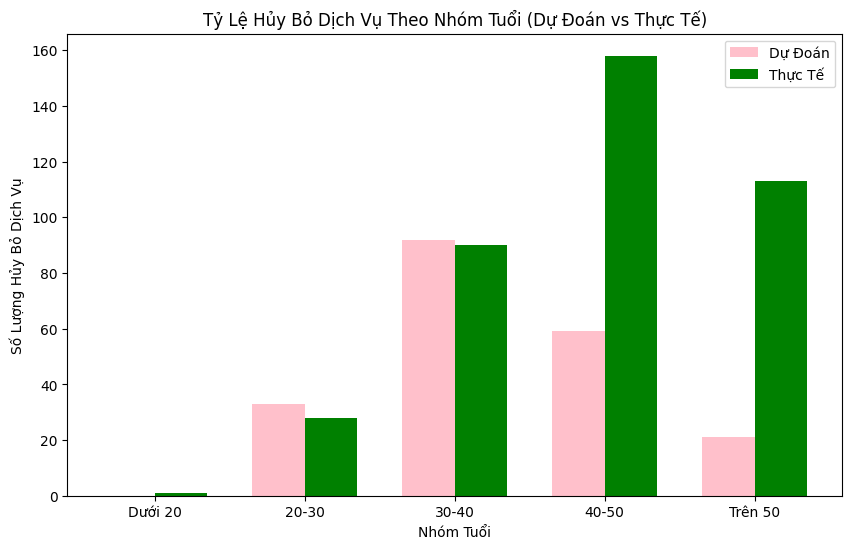

In [126]:
# Tạo dataframe kết hợp tuổi và dự đoán
age_exit_pred = pd.DataFrame({'Age': dataset.loc[X_test_index, 'Age'].values, 'Predicted_Exited': y_pred}) 
age_exit_pred['Age'] = age_exit_pred['Age'].astype(int) # Chuyển đổi cột "Age" thành số nguyên

# Tỉnh số lượng dự đoán hủy bỏ dịch vụ theo nhóm tuổi
age_groups = ['Dưới 20', '20-30', '30-40', '40-50', 'Trên 50']
age_exit_counts_pred = [
np.sum((age_exit_pred['Age'] < 20) & (age_exit_pred['Predicted_Exited'] == 1)), 
np.sum((age_exit_pred['Age'] >= 20) & (age_exit_pred['Age'] < 30) & (age_exit_pred['Predicted_Exited'] == 1)), 
np.sum((age_exit_pred['Age'] >= 30) & (age_exit_pred['Age'] < 40) & (age_exit_pred['Predicted_Exited'] == 1)),
np.sum((age_exit_pred['Age'] >= 40) & (age_exit_pred['Age'] < 50) & (age_exit_pred['Predicted_Exited'] == 1)), 
np.sum((age_exit_pred['Age'] >= 50) & (age_exit_pred['Predicted_Exited'] == 1))
]

# Tính số lượng thực tế hủy bỏ dịch vụ theo nhóm tuổi 
age_exit_real = dataset.loc[X_test_index, ['Age', 'Exited']]
age_exit_real['Age'] = age_exit_real['Age'].astype(int) # Chuyển đổi cột "Age" thành số nguyên

age_exit_counts_real = [
np.sum((age_exit_real['Age'] < 20) & (age_exit_real['Exited'] == 1)), 
np.sum((age_exit_real['Age'] >= 20) & (age_exit_real['Age'] < 30) & (age_exit_real['Exited'] == 1)), 
np.sum((age_exit_real['Age'] >= 30) & (age_exit_real['Age'] < 40) & (age_exit_real['Exited'] == 1)),
np.sum((age_exit_real['Age'] >= 40) & (age_exit_real['Age'] < 50) & (age_exit_real['Exited'] == 1)),
np.sum((age_exit_real['Age'] >= 50) & (age_exit_real['Exited'] == 1))
]

# Vẽ biểu đồ cột cho tỷ lệ dự đoán và thực tế hủy bỏ dịch vụ theo nhóm tuổi
bar_width = 0.35
r1= np.arange(len(age_groups))
r2= [x + bar_width for x in r1]
plt.figure(figsize=(10, 6)) # Set figure size
plt.bar(r1, age_exit_counts_pred, color='pink', width=bar_width, label='Dự Đoán')
plt.bar(r2, age_exit_counts_real, color='green', width=bar_width, label='Thực Tế')

plt.xlabel('Nhóm Tuổi')
plt.ylabel('Số Lượng Hủy Bỏ Dịch Vụ')
plt.title('Tỷ Lệ Hủy Bỏ Dịch Vụ Theo Nhóm Tuổi (Dự Đoán vs Thực Tế)')
plt.xticks([r + bar_width / 2 for r in range(len(age_groups))], age_groups)
plt.legend()
plt.show()

Hiển thị thông tin từng người

In [127]:
data = [] 
for i in range(30): data.append([usernames[i], y_pred[i], y_test[i]]) 
print(tabulate(data, headers=['Tên người dùng', 'Dự đoán', 'Thực tế'], tablefmt='psql'))

+------------------+-----------+-----------+
| Tên người dùng   |   Dự đoán |   Thực tế |
|------------------+-----------+-----------|
| Hargrave         |         0 |         0 |
| Hill             |         0 |         1 |
| Onio             |         0 |         0 |
| Boni             |         0 |         0 |
| Mitchell         |         0 |         0 |
| Chu              |         1 |         1 |
| Bartlett         |         0 |         0 |
| Obinna           |         0 |         0 |
| He               |         0 |         1 |
| H?               |         1 |         1 |
| Bearce           |         0 |         0 |
| Andrews          |         0 |         0 |
| Kay              |         0 |         0 |
| Chin             |         0 |         0 |
| Scott            |         1 |         1 |
| Goforth          |         0 |         1 |
| Romeo            |         0 |         0 |
| Henderson        |         0 |         0 |
| Muldrow          |         0 |         0 |
| Hao     